In [1]:
import sys
import json

import bindings.frontend as ph
import examples.pyhusky.outliers as ol
ph.env.pyhusky_start('master',14955,params={'disable_progress':True})
line = ph.env.load("/datasets/crawl/xf")
cities=["beijing","shanghai","shenzhen","guangzhou","huizhou","foshan","hangzhou","dongguan","suzhou"]

city_price=[]
for city in cities:
    city_c=line.filter(lambda x: city in x and "\u552e\u4ef7\u5f85\u5b9a" not in x)
    g_price =city_c.map(lambda x: int(json.loads(x)["price"])).cache()
    g = sorted(g_price.collect())
    price_average = g_price.reduce(lambda x,y:x+y)/g_price.count()
    g.append(price_average)
    city_price.append((city,range(len(g)),g))


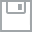
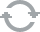
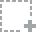
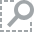
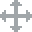
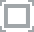
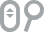
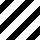
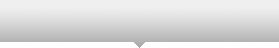
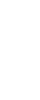
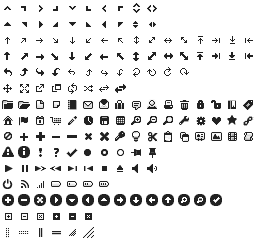
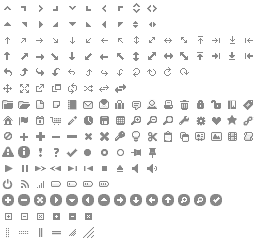
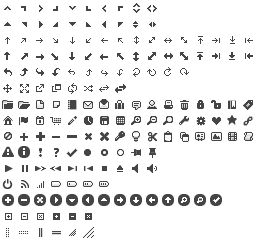
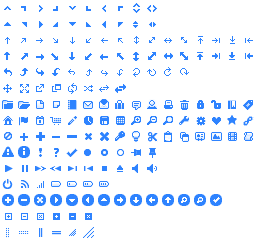
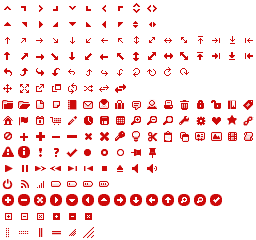
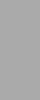
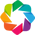
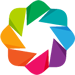

In [2]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import Range1d

output_notebook()
colors = ['#ff4488','#118844','#995533','#8327e7','#11ee22','#5599ee','#771199','#99dd33','#ed7439']
p = figure(plot_width = 1024, plot_height = 1024,x_range=(-2,200),title='Distribution of new-house price for some cities')
p.yaxis.axis_label='yuan'
p.xaxis.axis_label='The last point is the average price of the corresponding city'
i = 0
for data in city_price:
    p.line(data[1], data[2], line_width=2,legend=data[0])
    p.circle(data[1], data[2], fill_color=colors[i], size=8,legend=data[0])
    i+=1
show(p)